# Part 2: Model Comparison

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
                        
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

In [2]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Split Input and Traget Variables

In [3]:
X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

In [4]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (569, 31)
Shape of training dataset: (426, 30)
Shape of testing dataset: (143, 30)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Define Functions

#### Writing a function that returns the evaluation metrics as a DataFrame

In [7]:
def model_comparison(models =[], model_names= []):
    
    acc = []
    prec = []
    recal = []
    f1_train = []
    f1_test = []
    roc_auc = []
    pr_auc = []
    
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
        pred_prob = clf.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)

        
        f1_train.append(f1_score(y_hat_train, y_train))
        f1_test.append(f1_score(y_hat, y_test))
        acc.append(accuracy_score(y_hat, y_test))
        prec.append(precision_score(y_hat, y_test))
        recal.append(recall_score(y_hat, y_test))
        roc_auc.append(roc_auc_score(y_test, y_hat))
        pr_auc.append(auc(recall, precision))
        
    compare = pd.DataFrame({'Algorithm' : model_names , 'ROC_AUC': roc_auc, 'PR_AUC': pr_auc, 'Precision': prec, 'Recall': recal, 'F1_Train': f1_train, 'F1_Test': f1_test, 'Accuracy' : acc, })
    return compare

#### Writing a function returns Macro and Weighted average of Recall Score

In [8]:
def macro_weighted(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)

    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)

#### Detailed Macro & Weighted average values of the performance metrics

In [9]:
def macro_weighted_prec_rec(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)
    
    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)
    
    print ('.')
    
    prec_mac = metrics.precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", prec_mac)

    prec_wei = metrics.precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", prec_wei)

    f1_mac = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", f1_mac)

    f1_wei = metrics.f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", f1_wei)
    
    print ('.')
    
    acc = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy:", acc)
    

#### Performance of the Tarining & Test Set

In [10]:
 def f1_acc(y_test, y_hat, y_train, y_hat_train): 
    
    acc_train = metrics.accuracy_score(y_train, y_hat_train)
    print ("Accuracy Score of Train Set:", acc_train)
    
    acc_test = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy Score of Test Set:", acc_test)
    
    print ('.')
    
    f1_train = metrics.f1_score(y_train, y_hat_train, average = 'macro')
    print ("F1 Score of Train Set:", f1_train)
    
    f1_test = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("F1 Score of Test Set:", f1_test)
    
    ax1 = sns.distplot(y_train, hist=False, color='pink')
    sns.distplot(y_hat_train, hist=False, ax=ax1, color='lightblue')
    
    plt.title('Actual vs Predicted Values for Diagnosis (Training Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.show()
    
    ax2 = sns.distplot(y_test, hist=False, color='salmon')
    sns.distplot(y_hat, hist=False, ax=ax2, color='lightblue')
    plt.title('Actual vs Predicted Values for Diagnosis (Test Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.show()

#### Let's look at the ROC_AUC, Precision Recall AUC and the Confusion Matrices of the top 5 models

In [11]:
def roc_pr_cm(models=[]):
    
    roc_auc = []
    pr_auc = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
    
        # predict probabilities
        pred_prob = clf.predict_proba(X_test)
    
        # Print the confusion matrix
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(metrics.classification_report(y_test, y_hat, digits=3))
        
        print('---------------------------------------------------------------')
        
        macro_weighted(y_test, y_hat)
        
        print('---------------------------------------------------------------')
     
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
        roc_auc.append(roc_auc_score(y_test, y_hat))
    
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        # plot roc curves
        plt.plot(fpr, tpr, label = models[model])
    
        plt.title('ROC curve where AUC= {}'.format(roc_auc[model]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show();
    
        # calculate model precision-recall curve
        # precision, recall, _ = precision_recall_curve(y_hat , y_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)
        pr_auc.append(auc(recall, precision))
    
        # plot the model precision-recall curve
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        plt.plot(recall, precision, marker='.', label = models[model])
        plt.title('Precision Recall curve AUC= {}'.format(pr_auc[model]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='best')
        plt.show()

### Model Selection (a) LazyClassifier

In [12]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
model, predictions = clf.fit(X_train, X_test, y_train, y_test)
model

100%|██████████| 30/30 [00:01<00:00, 27.30it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.98,0.98,0.98,0.98,0.12
XGBClassifier,0.98,0.98,0.98,0.98,0.10
RandomForestClassifier,0.97,0.97,0.97,0.97,0.24
BaggingClassifier,0.97,0.97,0.97,0.97,0.05
LGBMClassifier,0.97,0.97,0.97,0.97,0.12
LinearDiscriminantAnalysis,0.97,0.96,0.96,0.97,0.01
SVC,0.97,0.96,0.96,0.96,0.02
QuadraticDiscriminantAnalysis,0.96,0.96,0.96,0.96,0.02
LogisticRegression,0.96,0.96,0.96,0.96,0.02


### Model Selection (b) Trying out Several Models

In [13]:
# Modelling Algorithms
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix

#### Let's try to model some classifiers for this dataset

In [14]:
models = [LogisticRegression(), AdaBoostClassifier(), BaggingClassifier(), KNeighborsClassifier(), RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), XGBClassifier(),
        DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB(), CatBoostClassifier(logging_level='Silent'), ExtraTreeClassifier(), LGBMClassifier(), LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis(), EasyEnsembleClassifier(random_state = 25)]

model_names=['LogisticRegression','AdaBoostClassifier', 'BaggingClassifier', 'KNearestNeighbors','RandomForest','BaggingRF', 'XGBoost', 'DecisionTree',
             'GradientBoosting','GaussianNB', 'CatBoost', 'ExtraTree', 'LGBM', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis', 'EasyClassifier']

model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,LogisticRegression,0.96,0.99,0.94,0.94,0.99,0.94,0.96
1,AdaBoostClassifier,0.98,1.00,0.98,0.96,1.00,0.97,0.98
2,BaggingClassifier,0.96,0.99,0.96,0.93,1.00,0.94,0.96
3,KNearestNeighbors,0.94,0.98,0.89,0.98,0.96,0.93,0.95
4,RandomForest,0.97,0.99,0.98,0.95,1.00,0.96,0.97
5,BaggingRF,0.97,0.99,0.98,0.95,0.99,0.96,0.97
6,XGBoost,0.98,1.00,0.96,0.98,1.00,0.97,0.98
7,DecisionTree,0.89,0.87,0.94,0.77,1.00,0.85,0.87
8,GradientBoosting,0.97,1.00,0.98,0.95,1.00,0.96,0.97
9,GaussianNB,0.91,0.98,0.89,0.89,0.93,0.89,0.92


#### What are the top 5 models with highest Recall Score (class 1)?

In [15]:
compare = model_comparison(models, model_names)
top5 = compare.nlargest(5,'Precision')
top5

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
1,AdaBoostClassifier,0.98,1.00,0.98,0.96,1.00,0.97,0.98
2,BaggingClassifier,0.97,1.00,0.98,0.93,0.99,0.95,0.97
4,RandomForest,0.98,1.00,0.98,0.96,1.00,0.97,0.98
5,BaggingRF,0.97,0.99,0.98,0.95,0.99,0.96,0.97
10,CatBoost,0.98,1.00,0.98,0.96,1.00,0.97,0.98


---------------------------------------------------------------


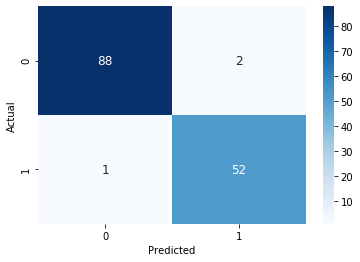

TP: 52, FP: 2, TN: 88, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.989     0.978     0.983        90
           1      0.963     0.981     0.972        53

    accuracy                          0.979       143
   macro avg      0.976     0.979     0.978       143
weighted avg      0.979     0.979     0.979       143

---------------------------------------------------------------
Recall Score: 0.9811320754716981
Macro Average of Recall Score: 0.9794549266247379
Weighted Average of Recall Score: 0.9790209790209791
---------------------------------------------------------------


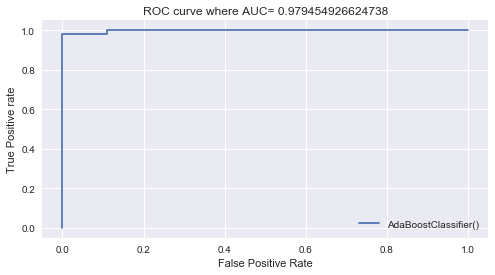

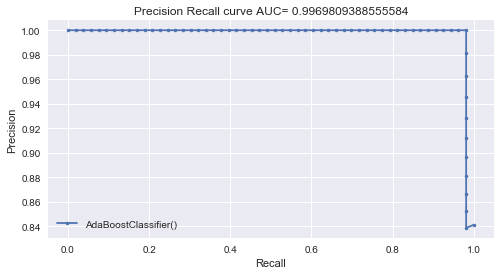

---------------------------------------------------------------


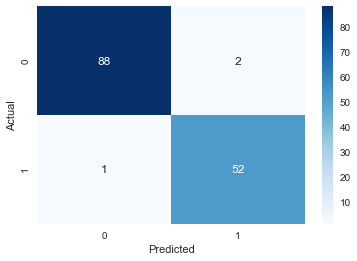

TP: 52, FP: 2, TN: 88, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.989     0.978     0.983        90
           1      0.963     0.981     0.972        53

    accuracy                          0.979       143
   macro avg      0.976     0.979     0.978       143
weighted avg      0.979     0.979     0.979       143

---------------------------------------------------------------
Recall Score: 0.9811320754716981
Macro Average of Recall Score: 0.9794549266247379
Weighted Average of Recall Score: 0.9790209790209791
---------------------------------------------------------------


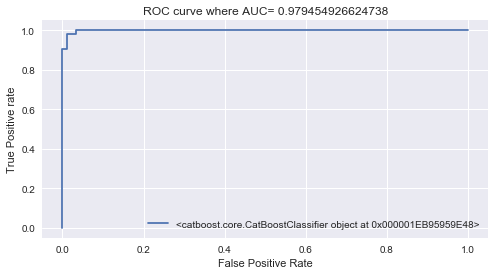

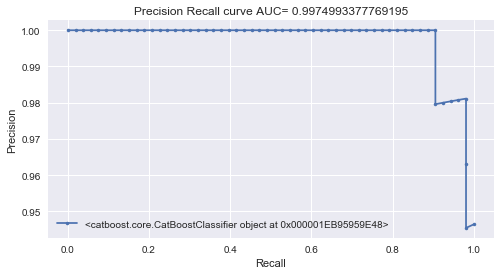

---------------------------------------------------------------


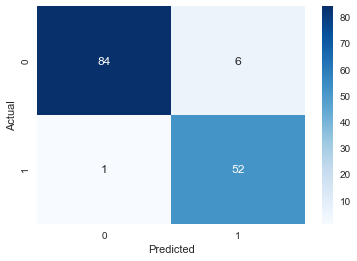

TP: 52, FP: 6, TN: 84, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.988     0.933     0.960        90
           1      0.897     0.981     0.937        53

    accuracy                          0.951       143
   macro avg      0.942     0.957     0.948       143
weighted avg      0.954     0.951     0.951       143

---------------------------------------------------------------
Recall Score: 0.9811320754716981
Macro Average of Recall Score: 0.9572327044025157
Weighted Average of Recall Score: 0.951048951048951
---------------------------------------------------------------


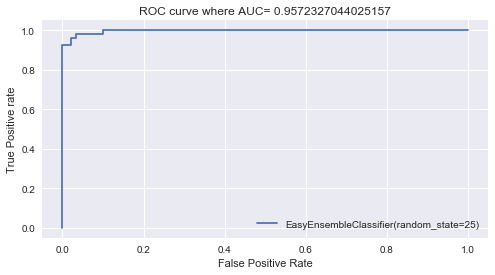

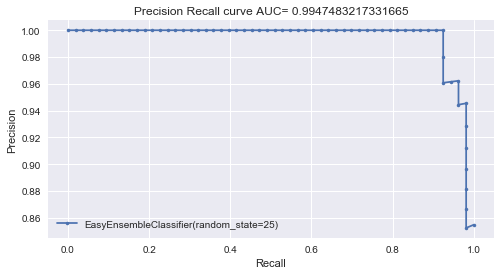

---------------------------------------------------------------


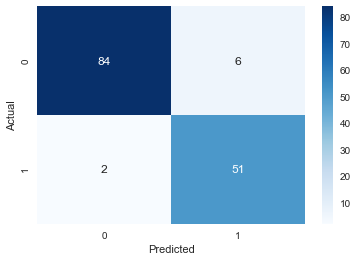

TP: 51, FP: 6, TN: 84, FN: 2
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.977     0.933     0.955        90
           1      0.895     0.962     0.927        53

    accuracy                          0.944       143
   macro avg      0.936     0.948     0.941       143
weighted avg      0.946     0.944     0.944       143

---------------------------------------------------------------
Recall Score: 0.9622641509433962
Macro Average of Recall Score: 0.9477987421383648
Weighted Average of Recall Score: 0.9440559440559441
---------------------------------------------------------------


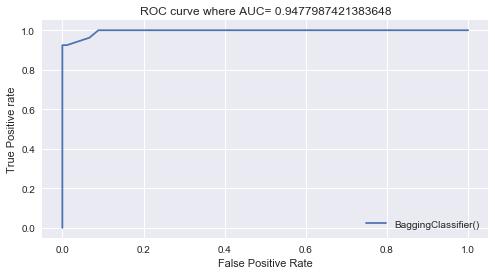

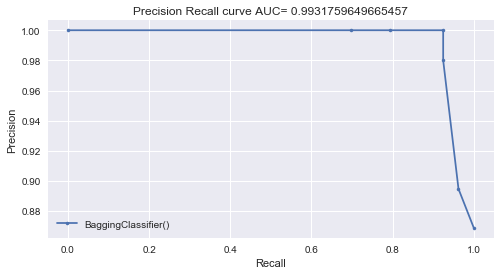

---------------------------------------------------------------


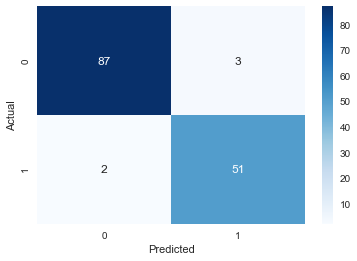

TP: 51, FP: 3, TN: 87, FN: 2
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.978     0.967     0.972        90
           1      0.944     0.962     0.953        53

    accuracy                          0.965       143
   macro avg      0.961     0.964     0.963       143
weighted avg      0.965     0.965     0.965       143

---------------------------------------------------------------
Recall Score: 0.9622641509433962
Macro Average of Recall Score: 0.9644654088050315
Weighted Average of Recall Score: 0.965034965034965
---------------------------------------------------------------


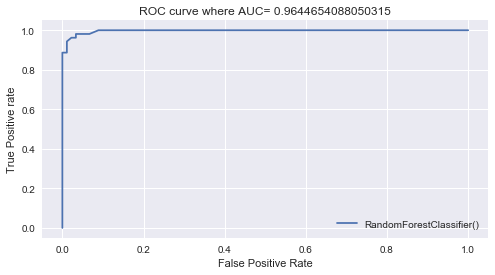

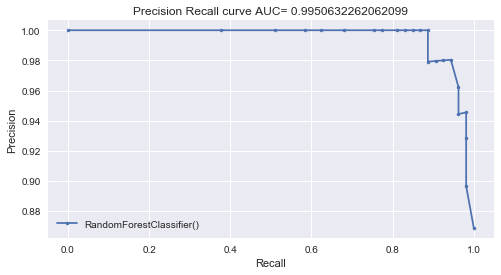

In [16]:
models = [AdaBoostClassifier(), CatBoostClassifier(logging_level='Silent'), EasyEnsembleClassifier(random_state = 25), BaggingClassifier(), RandomForestClassifier() ]
roc_pr_cm(models)

### Model Selected: AdaBoostClassifier

#### We want *smaller False Negative* value and *larger True Positive* Value in our case. Also, we want to mitigate the class imbalance problem.

- Recall Score: 0.9811320754716981
- Macro Average of Recall Score: 0.9794549266247379
- Weighted Average of Recall Score: 0.9790209790209791

In [17]:
from sklearn import model_selection
from pprint import pprint

ada = AdaBoostClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(ada.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}


In [18]:
ada.fit(X_train, y_train)
y_hat = ada.predict(X_test)
y_hat_train = ada.predict(X_train)

In [19]:
macro_weighted_prec_rec(y_test, y_hat)

Recall Score: 0.9811320754716981
Macro Average of Recall Score: 0.9794549266247379
Weighted Average of Recall Score: 0.9790209790209791
.
Macro Average of Precision Score: 0.9758635039533916
Weighted Average of Precision Score: 0.9792014061676984
Macro Average of F1 Score: 0.9776014201430585
Weighted Average of F1 Score: 0.9790604112120325
.
Accuracy: 0.9790209790209791


Accuracy Score of Train Set: 1.0
Accuracy Score of Test Set: 0.9790209790209791
.
F1 Score of Train Set: 1.0
F1 Score of Test Set: 0.9776014201430585


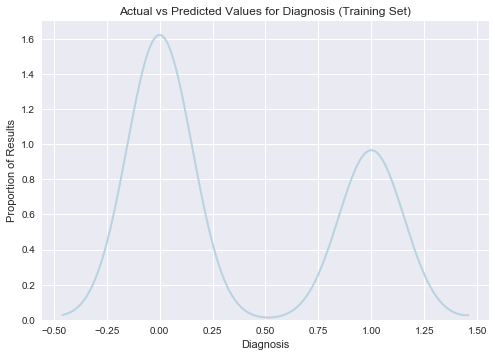

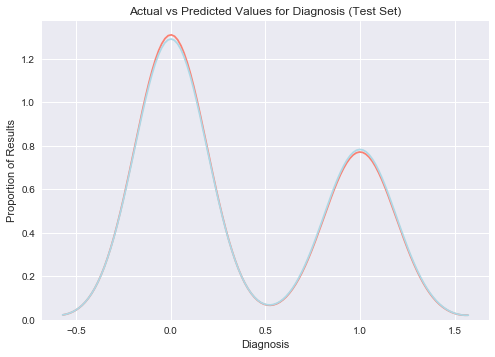

In [20]:
f1_acc(y_test, y_hat, y_train, y_hat_train)

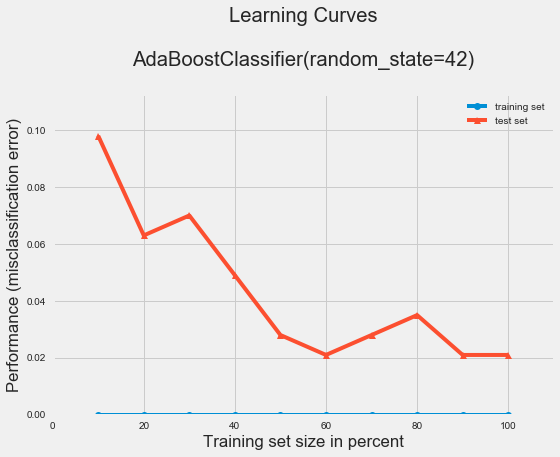

In [21]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, ada)
plt.show()

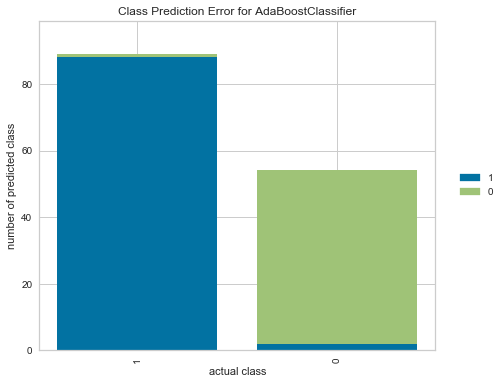

In [23]:
classes = [1, 0]

from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
    AdaBoostClassifier(random_state = 42), classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()